Canvas
======



To aid creative applications of machine learning models built in Python, we created a system module called ["py5canvas"](https://github.com/colormotor/py5canvas) that mimics the programming interface of P5Js by using Python in combination with the [Cairo](https://www.cairographics.org) drawing library. Eventually we will be able to use this also for interactive ML applications.
> **_NOTE:_**  The canvas module is not an extensively tested system. It is intended to facilitate creating images in Python with an interface that is familiar to Processing/P5js users. But you should eventually familiarize yourself with other more widely used drawing API's, such as Matplotlib or pyCairo. In other words, you should consider it a "gateway API" to these more complex systems that you will often encounter when looking at machine learning code available on the web. Don't hesitate to contact Daniel if you find any bugs or unexpected behaviors, by email ([daniel.berio@gold.ac.uk](mailto:daniel.berio@gold.ac.uk)) or by posting an "Issue" on github at this [link](https://github.com/colormotor/py5canvas/issues). Currently the API does not support all the same functions as P5js but it will be updated as we go along.

## Installation



#### With jupyter/desktop
First, you will need to install pyCairo (the Python interface to the Cairo drawing library) in your environment. The best way to do so is to use conda with:
```
conda install conda-forge::pycairo
```

Then install py5canvas with pip, using 
```
pip install git+https://github.com/colormotor/py5canvas.git
```

> **_NOTE:_** Because the py5canvas module is under heavy development, it is likely that you will need to update it **and then restart the kernel**. To do so you can use pip with: 
```
pip install --upgrade  --force-reinstall --no-deps git+https://github.com/colormotor/py5canvas.git
```

Alternatively. to avoid restarting the kernel you can use the following code snippet

In [1]:
from importlib import reload
from py5canvas import canvas
reload(canvas)

Running in /Users/mac/miniconda3/envs/dmlap/lib/python3.9/site-packages/py5canvas


<module 'py5canvas.canvas' from '/Users/mac/miniconda3/envs/dmlap/lib/python3.9/site-packages/py5canvas/canvas.py'>


#### With Google Collab
When using Google collab you will need to use `pip` and install with (based on [this](https://github.com/pygobject/pycairo/issues/39#issuecomment-391830334))


In [2]:
# WARNING!!!! Do NOT do this if you are running jupyter/python locally!!!
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install git+https://github.com/colormotor/py5canvas.git

zsh:1: command not found: apt-get


  Cloning https://github.com/colormotor/py5canvas.git to /private/var/folders/sr/zs7syfx13zzfn32_m3hpw17c0000gn/T/pip-req-build-91y_03cv
  Running command git clone --filter=blob:none --quiet https://github.com/colormotor/py5canvas.git /private/var/folders/sr/zs7syfx13zzfn32_m3hpw17c0000gn/T/pip-req-build-91y_03cv
  Resolved https://github.com/colormotor/py5canvas.git to commit 9d2b6798442664194494fb7dc4e8d3bfd9eb9f27
  Preparing metadata (setup.py) ... done


### Importing 
To test if the installation works, you should be able to use the `Canvas` object by importing it from the module with

In [2]:
from py5canvas.canvas import Canvas



## Basic example



Here is a basic working example that initializes a `Canvas` with a given size, creates a black background, draws a circle and then saves and displays the resulting image

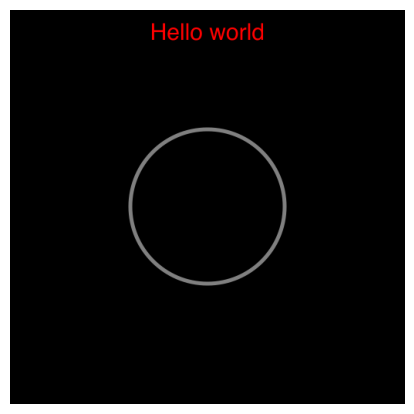

In [3]:
from py5canvas.canvas import Canvas

# Create our canvas object
c = Canvas(512, 512)

# Clear background to black
c.background(0)
# Set stroke only and draw circle
c.stroke(128)
c.no_fill()
c.stroke_weight(5)
c.circle(c.width/2, c.height/2, 100)
# Draw red text
c.fill(255, 0, 0)
c.text_size(30)
c.text([c.width/2, 40], "Hello world", center=True)
# Save image
c.save_image('test.png')
c.show()

The equivalent in P5js would look something like this
```Javascript
function setup() {
  createCanvas(512, 512);
  // Clear background to black
  background(0);
  // Set stroke only and draw circle
  stroke(128);
  noFill();
  strokeWeight(5);
  circle(width/2, height/2, 200);
  // Draw red text
  fill(255, 0, 0);
  noStroke();
  textSize(30);
  textAlign(CENTER);
  text("Hello world", width/2, 40);
}

function draw() {
}
```

You will notice that the programming interface is similar to p5js, although it does not currently handle animations (what would go in the `draw` function). Some of the main difference with respect to p5js are:

-   The naming convention uses `snake_case` rather than `camelCase`. That is, we use underscores to separate terms rather than capitalization. So for example the equivalent of the p5js `strokeWeight(...)` is `stroke_weight(...)`. This is convention is pretty much a standard in Python code.
-   Text rendering uses a slightly different syntax. The position to the `text` function is passed as a list (or numpy array) rather than two values following the string and alignment is specified as an (optional) string parameter to the same function.
-   Finally, we need to create a `Canvas` object for this system to work, so all the commands that you would usually write in the p5js editor need to have the reference to the canvas object prepended (e.g. `c.stroke(255)` rather than `stroke(255)` for a white stroke). Here we are calling the object `c` for brevity. You can picture the `c = Canvas(width, height)` as equivalent to `createCanvas(width, height)` in p5js.


## Step by step examples



### Creating and clearing a Canvas



To create a Canvas make sure you import the `canvas` module and then



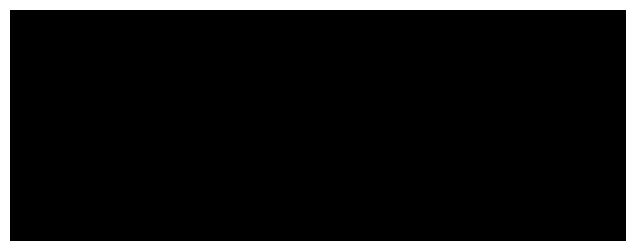

In [4]:
c = Canvas(800, 300)
c.show()

the `c.show()` method will display the current canvas image below the current notebook cell.


By default the `show` function will display a canvas in its specified size. But sometimes you may want to explicitly specify the size, e.g. if you are working with a very small canvas size.
You can set the size by specifying the `size` argument. However, note that the output will always maintain the aspect ratio of specified for the canvas, e.g. 


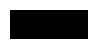

In [5]:
c.show(size=(100, 100))

By default the `Canvas` object is cleared to black. We can change this, e.g let&rsquo;s clear to red:

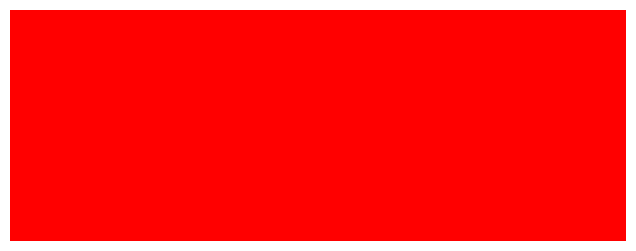

In [6]:
c.background(255, 0, 0)
c.show()

### Drawing text



To draw text use the `text` method. We can change size using `text_size` and optionally set the text to be horizontally centered. The text is colored with the current fill color, which is set with the `fill` function:



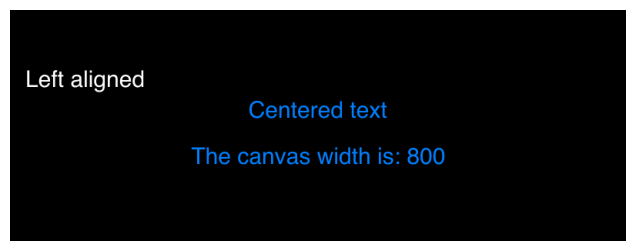

In [7]:
c.background(0)
c.text_size(30)
c.fill(255)
c.text([20, 100], "Left aligned")
c.fill(0, 128, 255)
c.text([c.width/2, 140], "Centered text", center=True)
c.text([c.width/2, 200], f"The canvas width is: {c.width}", center=True) # Using Python formatted strings
c.show()

P.s. note that in Python, `True` and `False` start with a capital!



### Basic shapes



Similarly to p5js we can draw basic shapes such as rectangles and circles. The main difference is that we specify coordinates as either lists or numpy arrays. E.g. for a rectangle we will use:



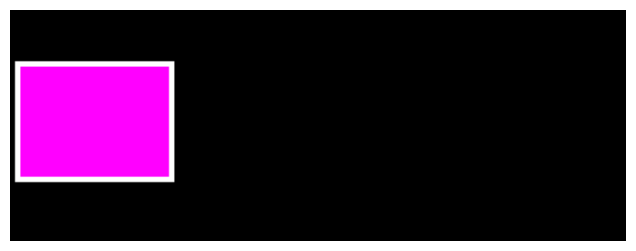

In [8]:
c.background(0)
c.fill(255, 0, 255)
c.stroke(255)
c.stroke_weight(7)
c.rectangle(10, 70, 200, 150) # you can use `rect` here as in p5  
c.show()

The `rectangle` method has two arguments, the `[x,y]` coordinates of the top left corner and the size `[width, height]` of the rectangle.
Here we first set the fill and stroke color with `fill` and `stroke` and then also the stroke thickness with `stroke_weight`.

Let's also add a blue circle to the canvas:

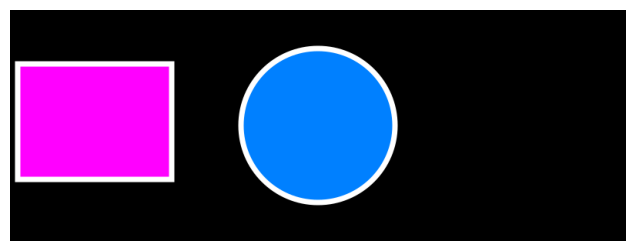

In [9]:
c.fill(0, 128, 255)
c.circle(400, c.height/2, 100)
c.show()

Note that here we did not clear the canvas so we the rectangle is still visible.

### Color modes



By default the canvas uses RGB colors specified in the range between 0 and 255. We can specify colors as single arguments similarly to p5js



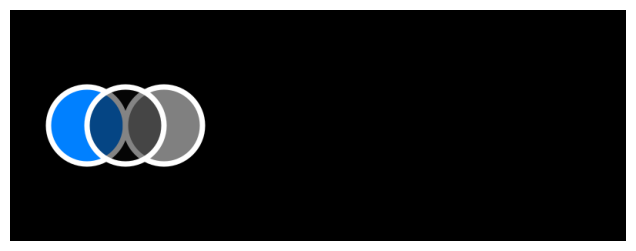

In [10]:
c.background(0)
c.fill(0, 128, 255)
c.circle(100, c.height/2, 50)
c.fill(128) # Only one value is grayscale
c.circle(200, c.height/2, 50)
c.fill(10, 128) # Two values is gray, alpha
c.circle(150, c.height/2, 50)
c.show()

Or we can use arrays/lists. For example here we specify a random RGB color with `np.random.uniform`:



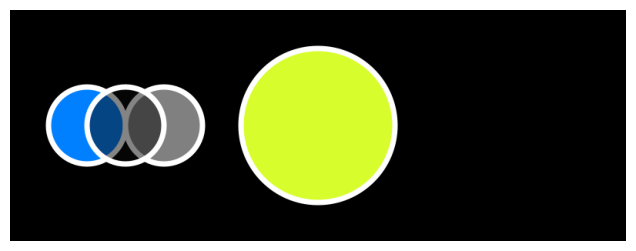

In [11]:
import numpy as np
c.fill(np.random.uniform(0, 255, 3))
c.circle(c.width/2, c.height/2, 100)
c.show()

We can also change &ldquo;color mode&rdquo; and the range of the values. E.g. say we want to draw a series of circles with all the hues. We can set the color mode to hue saturation and brightness (`"hsv"` )
and set the range to be between `0` and `1`:



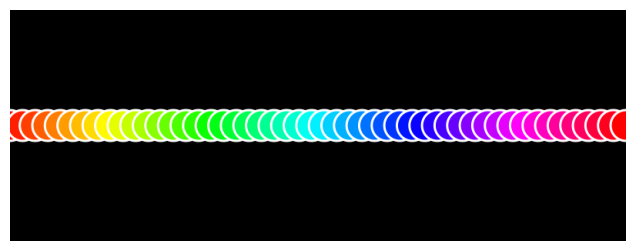

In [12]:
c.background(0)
c.color_mode('hsv', 1.0)
c.stroke(1.0, 0.0, 1.0) # Zero saturation
c.stroke_weight(3)
for hue in np.linspace(0, 1, 50):
    c.fill(hue, 1.0, 1.0)
    c.circle(hue*c.width, c.height/2, 20)
c.show()
# Set color mode back to rgb for the next examples
c.color_mode('rgb', 255)

Here we used the `np.linspace` function to create a sequence of `50` values between `0` and `1`.

Optionally, we can also create HSV colors with the `hsv` methods, which expects values between 0 and 1. Again these values can be passed in as a `list` or `np.array` or as single values:

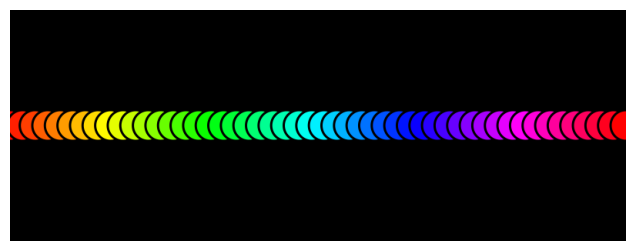

In [13]:
c.background(0)
c.stroke(0.0)
c.stroke_weight(3)
for hue in np.linspace(0, 1, 50):
    c.fill(c.hsv(hue, 1.0, 1.0))
    c.circle(hue*c.width, c.height/2, 20)
c.show()

### Polygons and polylines



In p5js, to draw a polygon we would write a series of `vertex(x,y)` calls between a `beginShape()` and `endShape()` pairs. Here we will use a list of points or a numpy array to do so. For example to draw a random polyline we can do:



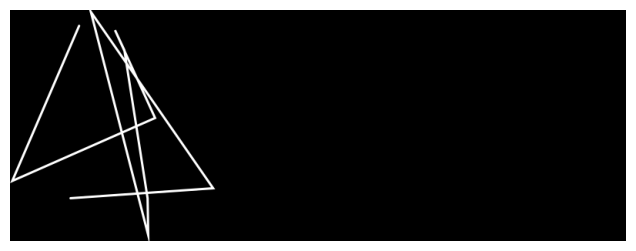

In [14]:
c.background(0)
c.no_fill()
c.stroke(255)
c.polyline(np.random.uniform(0, c.height, (10, 2)))
c.show()

Note that here we specify the &ldquo;shape&rdquo; of the array as 10 rows and 2 columns, meaning that we have 10 points, where each point consists of 2 coordinates (x and y).

Alternatively we can simply specify the coordinates of a polygon with a list. For example to draw a triangle we could do:



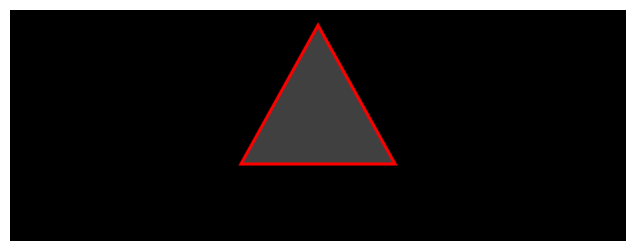

In [15]:
c.background(0)
c.fill(64)
c.stroke(255, 0, 0)
c.stroke_weight(4)
c.polygon( [[400, 20],
            [500, 200],
            [300, 200]] )
c.show()

Here we are using the `polygon` function that produces a closed polygon. Alternatively we can also use `c.polyline(points, closed=True)`.

Now let&rsquo;s draw a series of regular polygons using a Python syntax known as [list comprehensions](https://www.w3schools.com/python/python_lists_comprehension.asp):



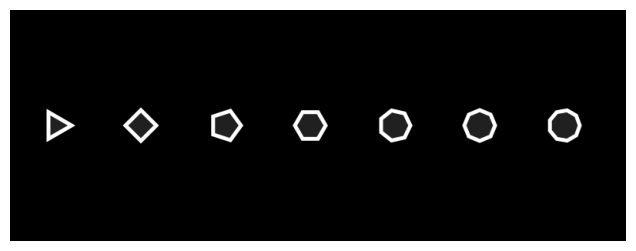

In [16]:
c.background(0)
c.fill(32)
c.stroke(255)
c.stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (c.width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = c.height/2
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
               np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    c.polygon(points)
c.show()

Here we could have filled the points with a loop of the type:



In [17]:
points = []
for t in np.linspace(0, 1, sides+1):
    points.append([np.cos(t*np.pi*2)*20 + x + radius*2,
                   np.sin(t*np.pi*2)*20 + y])

The above is equivalent but more concise.



### Shapes with holes



We can draw shapes with holes by using combining different shapes betwen a `begin_shape()` and an `end_shape()` pair. For example here we &ldquo;dig&rdquo; a circular hole into a rectangle.



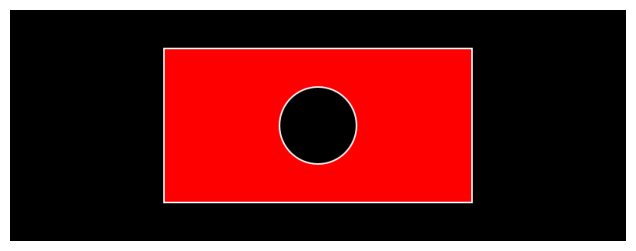

In [19]:
from importlib import reload
from py5canvas import canvas
reload(canvas)

from py5canvas.canvas import Canvas
c = Canvas(800, 300)

c.background(0)
c.fill(255, 0, 0)
c.stroke(255)
c.begin_shape()
c.rect_mode('center') # Note that rect mode accepts a string as an input 
c.rectangle(c.width/2, c.height/2, 400, 200)
c.circle(c.width/2, c.height/2, 50)
c.end_shape()
c.show()

Holes will be computed according to the [&ldquo;even odd&rdquo; fill rule](https://en.wikipedia.org/wiki/Even–odd_rule).



### Images



The canvas object allows to display images encoded as numpy arrays. For example, we could create a grayscale image
with random values between 0 and 1 and then display it with:



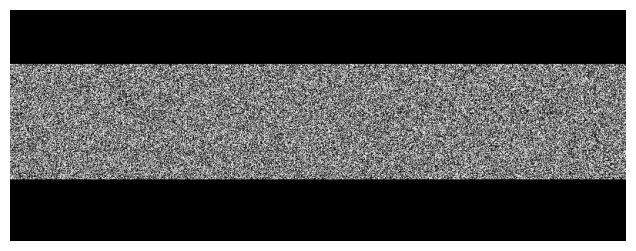

In [18]:
import numpy as np
c = Canvas(800, 300)
c.background(0)
im = np.random.uniform(0, 1, (150, c.width))
c.image(im, 0, 70)
c.show()

Note that size (the `.shape` property) in numpy arrays is specified as `(rows, columns)` so we specify the size of the array as `(height, width)`. The second argument to the `c.image` method is the position of the top left corner of the image.



#### Loading images



There are many ways to load an image from disk as a numpy array. Here we will use the [Pillow](https://pypi.org/project/Pillow/) library which can be accessed with the `PIL` module:



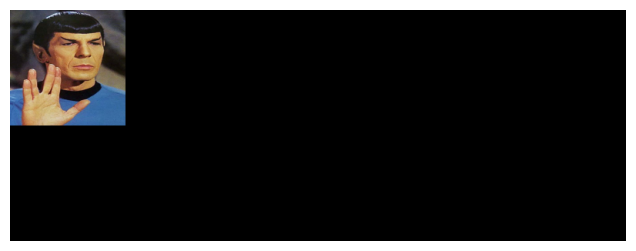

In [19]:
from PIL import Image
c.background(0)
im = np.array(Image.open('images/spock.jpg'))
c.image(im, 0, 0, 150, 150)
c.show()

Here we also specify the size with a third argument `(width, height)`. In this case the image will be in rgb format and have shape:



In [20]:
im.shape

(688, 500, 3)

And it will have a `np.uint8` data type:



In [21]:
im.dtype

dtype('uint8')

Because the result is a numpy array, we can easily do mathematical operations on it. To do so it is convenient to convert the array to floating point by scaling it to the 0 to 1 range:



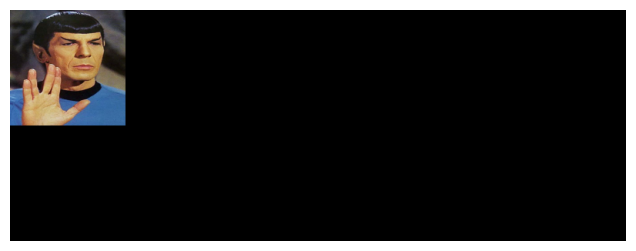

In [22]:
im = im/255
c.background(0)
c.image(im, 0, 0, 150, 150)
c.show()

Even though we scaled the image, we can render it identically. Internally the Canvas object will check the `dtype` property of the array and expect values between 0 and 255 if `dtype` is `np.uint8` and values between 0 and 1 otherwise. The `[0,1]` range is convenient for certain operations, for example we may raise the image to a power or take it&rsquo;s cosine (whatever meaning this may have):



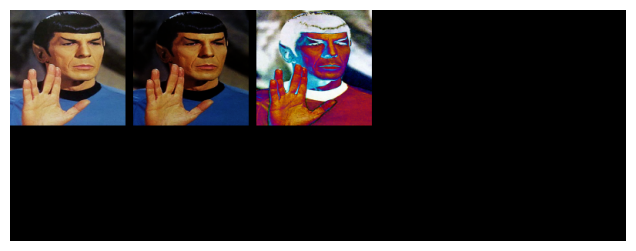

In [23]:
c.image(im**2, 160, 0, 150, 150)
c.image(np.cos(im*np.pi*2)*0.5 + 0.5, 320, 0, 150, 150)
c.show()

We can also scale each RGB channel separately with a multiplication, for example:



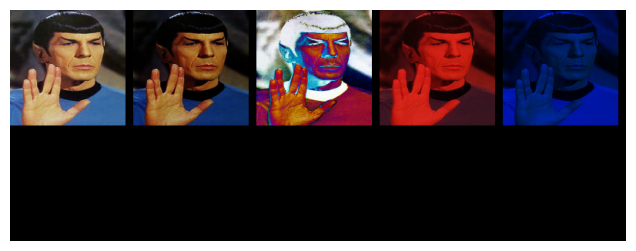

In [24]:
c.image(im*[1.0, 0.2, 0.2], 480, 0, 150, 150)
c.image(im*[0.0, 0.2, 1.0], 640, 0, 150, 150)
c.show()

### Transformations

The ~Canvas~ object also enables transformations similarly to p5js. E.g. let's draw rectangles revolving around the center of the canvas:

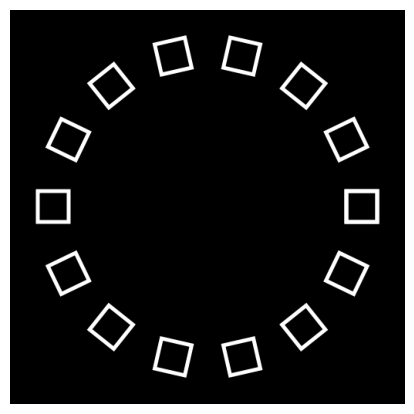

In [25]:
c = canvas.Canvas(512, 512)
c.background(0)
c.no_fill()
c.stroke(255)
c.stroke_weight(5.0)
# Shift origin to center
c.translate(c.width/2, c.height/2)
for rot in np.linspace(0, np.pi*2, 15):
    c.push() # Push transformation
    c.rotate(rot) # Rotation is specified in radians, use rotate_deg if you want to use degrees
    c.translate(200, 0)
    c.rectangle(-20, -20, 40, 40)
    c.pop() # Pop transformation
c.show()

Similarly to p5js we can use `push` and `pop` to save and restore the state of the transformation and differently from p5js we use lists or numpy arrays to specify positions and sizes.

## Recap



Here is a canvas example with some of the functionalities discussed above:



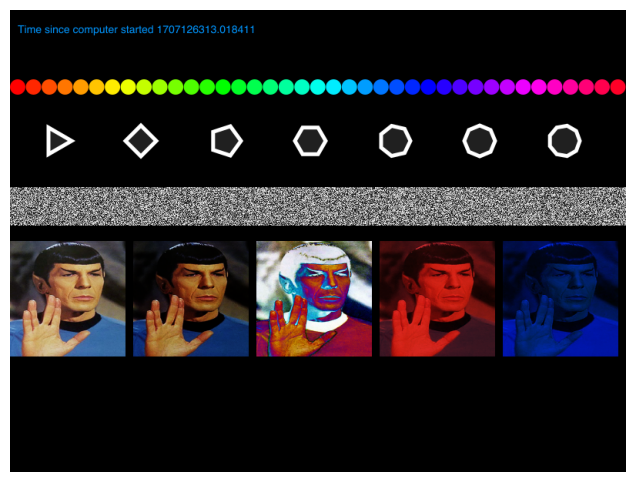

In [26]:
import time
import numpy as np
from PIL import Image
reload(canvas)
c = canvas.Canvas(800, 600)
c.text_size(14)
c.fill(0, 150, 255)
# A formmatted string example
c.text([10, 30], f"Time since computer started {time.time()}")
# Some colored squares using np.linspace for a loop
# Set color mode to hue-saturation-brightness with a scale of 1
c.color_mode('hsv', 1.0)
c.no_stroke()
for t in np.linspace(0, 1, 40):
    c.fill(t, 1.0, 1.0)
    c.circle(t*c.width+10, 100, 10)
# Go back to rgb with scale of 255
c.color_mode('rgb', 255)
# Draw a series of closed regular polygons with increasing number of sides
c.fill(32)
c.stroke(255)
c.stroke_weight(5)
start_sides, end_sides = 3, 10
for sides in range(start_sides, end_sides):
    radius = 30
    x = (c.width - radius) * (sides - start_sides)/(end_sides - start_sides)
    y = 170
    # This creates the coordinates of the polygon
    points = [[np.cos(t*np.pi*2)*20 + x + radius*2,
                np.sin(t*np.pi*2)*20 + y] for t in np.linspace(0, 1, sides+1)]
    c.polygon(points)
# Create a numpy array with random values between 0 and 1 and treat it as an image
# Note that size is specified as rows, columns (height, width)
im = np.random.uniform(0, 1, (50, c.width))
c.image(im, [0, 230])
# We can also load an image. Here we use PIL, but there are many other methods
im = np.array(Image.open('images/spock.jpg'))
c.image(im, 0, 300, 150, 150)
# Because the image is a numpy array we can perform operations on it
# The Canvas object will also work with images that are in the [0,1] range,
# rather than [0, 255] range. This will make performing math on the pixels easier
im = im/255
c.image(im**2, 160, 300, 150, 150)
c.image(np.cos(im*np.pi*2)*0.5 + 0.5, 320, 300, 150, 150)
# Here we muliply each channel (RGB) by a value
c.image(im*[1.0, 0.2, 0.2], 480, 300, 150, 150)
c.image(im*[0.0, 0.2, 1.0], 640, 300, 150, 150)
# We can draw holes by combining draw calls
c.show()

## Additional utilities

The `canvas` module also exposes some utilities to display images encoded as numpy arrays. E.g.

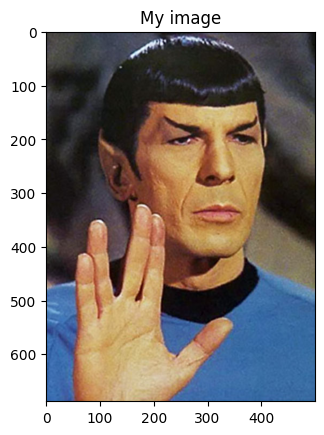

In [27]:
canvas.show_image(im, title='My image')

This is pretty much a wrapper to matplotlib, but it handles things like placing a title for you. Simply visualizing an image using straight matplotlib can be also done with:

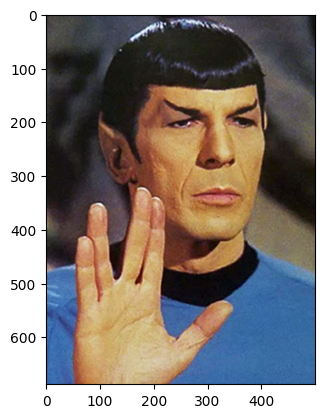

In [28]:
import matplotlib.pyplot as plt
plt.imshow(im)

RGB images are always shown with the original colors. For single channel images, it is possible to specify a "color map" parameter.
For a list of available color maps refer to [https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

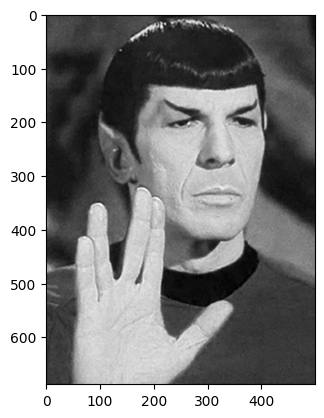

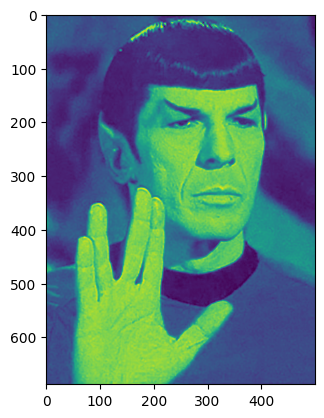

In [29]:
gray_im = im[:,:,0] # Get the red channel
canvas.show_image(gray_im)
canvas.show_image(gray_im, cmap='viridis')

The ~canvas.show_images~ is similar, but it allows to automatically create a grid of many images, by specifying the number of columns and automatically computing the number rows. E.g


3


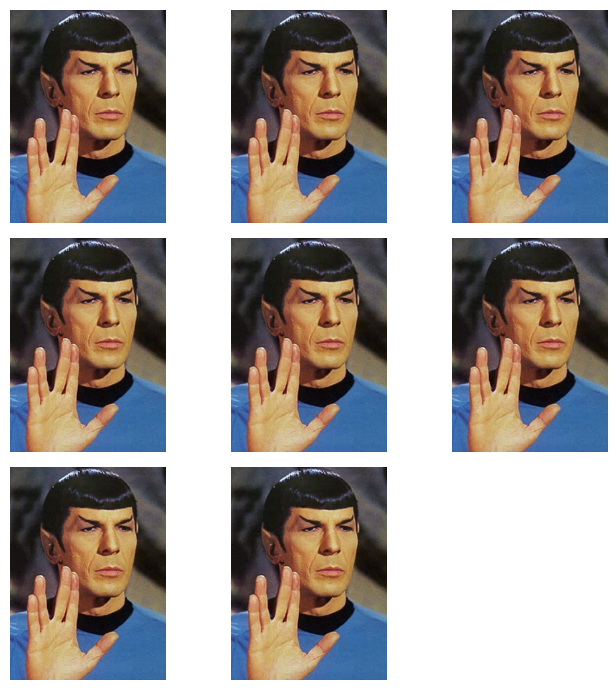

In [30]:
canvas.show_images([im, im, im, im, im, im, im, im], 3, size=(7,7))

## A simple face detection example with canvass

Let&rsquo;s finally look at a simple face landmark detection example in Python. We will use the [face_recognition](https://pypi.org/project/face-recognition/) package, which gives a simple interface to the [dlib](http://dlib.net) face detection library.
We will install the required libraries with conda using this slightly more modern (but equivalent to `-c conda-forge`) syntax:

    conda install conda-forge::dlib
    conda install conda-forge::face_recognition 

Or **if you are working in google collab**:

In [33]:
!pip install face_recognition

After importing the `face_recognition` module, finding the face landmarks is just one line of code:

In [31]:
import face_recognition
im = np.array(Image.open('images/spock.jpg'))
landmark_features = face_recognition.face_landmarks(im)[0]
print(landmark_features)

ModuleNotFoundError: No module named 'face_recognition'

The features are organized as a list of dictionaries, one dictionary for each face detected in the image and where each dictionary contains a feature (e.g. `chin`, `nose_bridge`) with the corresponding landmark points that are organized as a list of tuples (`[(x, y), (x, y), ...]`). Since we expect only one face in the example image, we add `[0]` at the end of the function call, which only returns the first face detected. We can use the dictionary-based organization of features to identify the positions of the eyes and mouth. In the following code we will use the [`np.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function to compute the mean (or average, or center of mass) of the points of each feature. Numpy functions can work with lists as long as these are formatted similarly to a numpy array. The `axis` parameter determines along which dimension to compute the mean, so `axis=0` means that elements of the array will be summed vertically.

dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])


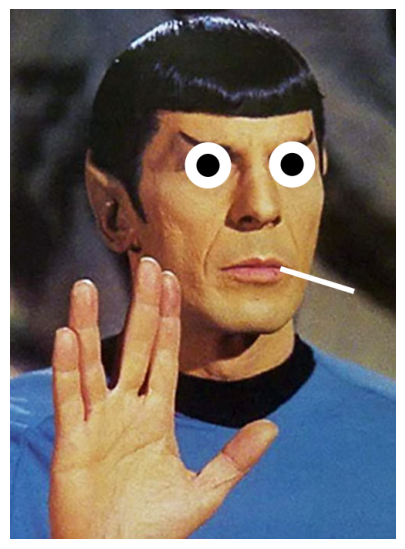

In [37]:
import face_recognition
im = np.array(Image.open('images/spock.jpg'))
landmark_features = face_recognition.face_landmarks(im)[0]
# Print features so we know what to get
print(landmark_features.keys())
c = Canvas(im.shape[1], im.shape[0])

# Draw eyes as circles at the average of the corresponding features
left_eye_pos = np.mean(landmark_features['left_eye'], axis=0)
right_eye_pos = np.mean(landmark_features['right_eye'], axis=0)
mouth_pos = np.mean(landmark_features['top_lip'] + landmark_features['bottom_lip'], axis=0)
c.background(0)
c.image(im)
c.no_stroke()
c.fill(255)
c.circle(left_eye_pos, 30)
c.circle(right_eye_pos, 30)
c.fill(0)
c.circle(left_eye_pos, 15)
c.circle(right_eye_pos, 15)

c.translate(mouth_pos+[30, 0])
c.rotate(0.3)
c.fill(255, 255, 255)
cig_size = 7
c.rectangle(-cig_size/2, -cig_size/2, 100, cig_size)
#c.fill(255, 0, 0)
#mouth_size = np.array([140, 10])
#c.rectangle(mouth_pos - mouth_size/2, mouth_size)
c.show()